In [7]:
import sys
import heapq
import random
import matplotlib.pyplot as plt
from timeit import timeit
from tqdm import tqdm


In [14]:
def with_sorted(iterable, n):
    return sorted(iterable, reverse=True)[:n]

def with_nlargest(iterable, n):
    return heapq.nlargest(n, iterable)

def generate_unsorted_iterable(length):
    return [random.randint(0, 1_000_000) for _ in range(length)]


n = 3  # largest n form list
lengts = list(range(10,500,5))
times = {
    'with_sorted':[],
    'with_nlargest': []
}
for length in tqdm(lengts):
    unsorted_iterable = generate_unsorted_iterable(length)
    for func in [with_sorted, with_nlargest]:
        t = timeit(lambda: func(unsorted_iterable, n))
        times[func.__name__].append(t)

100%|██████████| 98/98 [25:43<00:00, 15.75s/it]


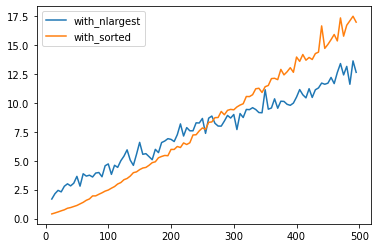

In [15]:
plt.plot(lengts, times['with_nlargest'], label="with_nlargest")
plt.plot(lengts, times['with_sorted'], label="with_sorted")
plt.legend()